#  Linear first order plus time delay(FOPTD)

## 1.import library

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# setup : conda install -c conda-forge control slycot
import control
#from control.matlab import *
from scipy.optimize import minimize

## 2.First order plus Time Delay Models

In [28]:
def foptd(t,K=1,tau=1,tau_d=0):
    tau_d = max(0,tau_d)
    tau = max(0,tau)
    y = np.array([K*(1-np.exp(-(t-tau_d)/tau)) if t >= tau_d else 0 for t in t])
    return y 

In [29]:
t= np.linspace(0,50,200)
tau = 10
tau_delay = 3
K = 2

y = foptd(t,K,tau,tau_delay)

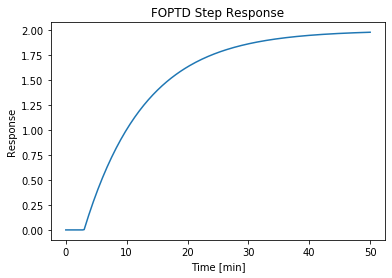

In [30]:
plt.plot(t,y)
plt.xlabel('Time [min]')
plt.ylabel('Response')
plt.title('FOPTD Step Response')
plt.show()

# Fitting an FOPTD model

In [39]:
#parameter
Volatile_comp = 0.87
delta_t = 60
Flow_raised = 120 
Flow_condense = 110 

In [37]:
# create the hypothetical problem data
delta_y,t = step(0.05*control.tf([-2,1],[25,10,1]))
y = Volatile_comp + delta_y
t = t + delta_t

Text(0.5, 1.0, 'Vapor mole fraction response to 10 kg/hr increase in cooling')

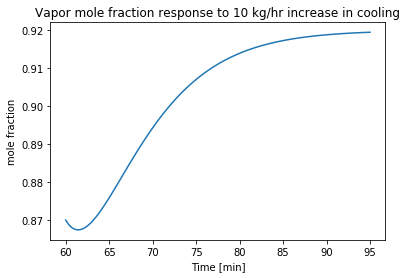

In [33]:
plt.plot(t,y)
plt.xlabel('Time [min]')
plt.ylabel('mole fraction')
plt.title('Vapor mole fraction response to 10 kg/hr increase in cooling')

#### Step 1.Shift and scale the experimental data to correspond to a unit step input at time t=0

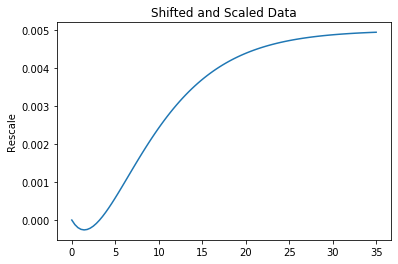

In [43]:
ts = t - t[0] # t_shift at start experiment
ys = (y-y[0])/(Flow_raised-Flow_condense)

plt.plot(ts,ys)
plt.title('Shifted and Scaled Data')
plt.ylabel('mole fraction Rescale')
plt.show()

#### Step 2. Create a function to compute the response of an FOPTD model

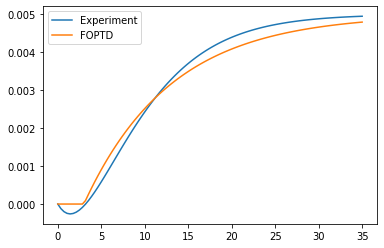

In [44]:
def foptd(t,K=1,tau=1,tau_d=0):
    tau_d = max(0,tau_d)
    tau = max(0,tau)
    y = np.array([K*(1-np.exp(-(t-tau_d)/tau)) if t >= tau_d else 0 for t in t])
    return y
z = foptd(ts,0.005,10,3) # t = time resclae(ts)
plt.plot(ts,ys) # Experiment Rescale
plt.plot(ts,z) # foptd rescales
plt.legend(['Experiment','FOPTD'])
plt.show()

#### Step 3. Create a function to measure the error between an FOPTD model the experimental data

In [45]:
# integral absolute error (IAE)
def err(X,t,y):
    K,tau,tau_d = X
    z = foptd(t,K,tau,tau_d)
    iae = sum(abs(z-y))*(max(t)-min(t))/len(t)
    return iae
X = [0.005,10,3]
err(X,ts,ys)

0.00776321356654393

#### Step 4. Use scipy.optimuze.minimize() to find the best fiting FOPTD model

In [46]:
K,tau,tau_d = minimize(err,X,args=(ts,ys)).x

print('K = {:.5f}'.format(K))
print('tau = {:.2f}'.format(tau))
print('tau_d = {:.2f}'.format(tau_d))

K = 0.00512
tau = 8.14
tau_d = 4.52


In [47]:
X = [K,tau,tau_d]
err(X,ts,ys)

0.0021109603302633144

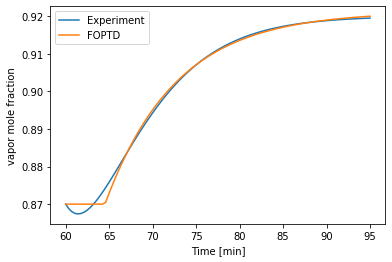

In [49]:
#### Step 5. Rescale FOPTD output and compare to experimental data
z = foptd(ts,K,tau,tau_d)
y_pred = y[0]+z*(Flow_raised-Flow_condense) # inverse

plt.plot(t,y) # Experiment
plt.plot(t,y_pred) # FOPTD
plt.xlabel('Time [min]')
plt.ylabel('vapor mole fraction')
plt.legend(['Experiment','FOPTD'])
plt.show()